
<DIV ALIGN=CENTER>

# Practical Data Science  
## University of Illinois, Research Park  
## Robert J. Brunner  
## Spring 2015  
  
</DIV>  
-----
-----

## Week 1: Introduction to Practical Data Science
 
### Topic 1: [Course Introduction][1]:

Week one starts with an introduction to the overall course, the planned
syllabus, and the use of our course Piazza.

### Topic 2: [Virtualization and Docker Technology][2]

Learn about virtualization, and how to use the Docker container
technology to complete this course.

### Topic 3: [Source Code Control][3]

Learn about source code control, and how to use `git` and _github_ to manage software development.

-----

## Optional Topics


### Topic 4: Using the `vim` editor

- Interactive [`vim` Tutorial](http://www.openvim.com/tutorial.html)
- Linux based [`vim` tutorial](http://linuxconfig.org/vim-tutorial)

-----

[1]: introduction.ipynb
[2]: virtualization.ipynb
[3]: intro2github.ipynb

In [2]:
import pandas as pd
print(pd.version.version)


0.16.2


In [3]:
data.memory_usage(verbose=true)


NameError: name 'data' is not defined

In [16]:
!ls /home/data_scientist/rpdm/data




2001.csv


In [11]:
!wget http://stat-computing.org/dataexpo/2009/2001.csv.bz2

--2015-09-01 23:09:26--  http://stat-computing.org/dataexpo/2009/2001.csv.bz2
Resolving stat-computing.org (stat-computing.org)... 54.231.168.107
Connecting to stat-computing.org (stat-computing.org)|54.231.168.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83478700 (80M) [application/x-bzip2]
Saving to: ‘2001.csv.bz2’

100%[======================================>] 83,478,700  1.40MB/s   in 67s    

2015-09-01 23:10:34 (1.19 MB/s) - ‘2001.csv.bz2’ saved [83478700/83478700]



In [25]:
dtype=dict(zip(cnms, dts)),

In [28]:
filename = '/home/data_scientist/rpdm/data/2001.csv'

import numpy as np

ucs=(1, 3, 4, 14, 15, 16, 17, 18)

cnms = ['month', 'Day', 'dTime', 'aDelay', 'dDelay', 'depart', 'arrive', 'distance']

#cnms = ['aDelay', 'dDelay', 'Day', 'dTime', 'aTime', 
#        'month', 'uc', 'fnum', 'depart', 'arrive', 'distance' ]

%time data = pd.read_csv(filename, header=0, na_values=['NA'], usecols=ucs, names=cnms)


CPU times: user 4.59 s, sys: 2.64 s, total: 7.23 s
Wall time: 8.6 s


In [31]:
newdata = data.dropna()


In [32]:
dts = [np.uint8, np.uint8, np.uint16, np.int16, np.int16, object, object, np.uint16]

nd = pd.DataFrame()

for i in range(len(cnms)):
    nd[[cnms[i]]] = newdata[[cnms[i]]].astype(dts[i])

In [34]:
nd.dtypes

month        uint8
Day          uint8
dTime       uint16
aDelay       int16
dDelay       int16
depart      object
arrive      object
distance    uint16
dtype: object

In [35]:
nd.describe()

,month,Day,dTime,aDelay,dDelay,distance
count,5723673.000000,5723673.000000,5723673.000000,5723673.000000,5723673.000000,5723673.000000
mean,6.291581,3.949829,1348.688044,5.528249,8.115272,735.173682
std,3.381755,1.997942,482.638757,31.429291,28.234083,574.815182
min,1.000000,1.000000,1.000000,-1116.000000,-204.000000,21.000000
25%,3.000000,2.000000,930.000000,-9.000000,-3.000000,314.000000
50%,6.000000,4.000000,1333.000000,-2.000000,0.000000,575.000000
75%,9.000000,6.000000,1740.000000,10.000000,6.000000,983.000000
max,12.000000,7.000000,2400.000000,1688.000000,1692.000000,4962.000000


In [42]:
chicago = nd.loc[nd['depart'] == 'ORD']

In [45]:
chicago.describe()

,month,Day,dTime,aDelay,dDelay,distance
count,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000
mean,6.354067,3.945843,1386.255721,8.916938,11.812635,769.109138
std,3.382844,1.999317,466.639178,36.284050,31.590608,524.643619
min,1.000000,1.000000,1.000000,-67.000000,-43.000000,67.000000
25%,3.000000,2.000000,1004.000000,-10.000000,-2.000000,334.000000
50%,6.000000,4.000000,1356.000000,-1.000000,0.000000,678.000000
75%,9.000000,6.000000,1811.000000,14.000000,11.000000,925.000000
max,12.000000,7.000000,2400.000000,1473.000000,1477.000000,4243.000000


In [50]:

# Lets make a Pivot Table

# First we group the data by Month and Day
df = chicago.groupby(['month', 'Day'])
dd = df.mean()
dd.head()

dd.reset_index(inplace=True)  
dd['dDelay'] = dd['dDelay'].astype(int)

# Now we pivot the DataFrame to make a Matrix with values encoded.
dp = dd.pivot('month', 'Day', 'dDelay')

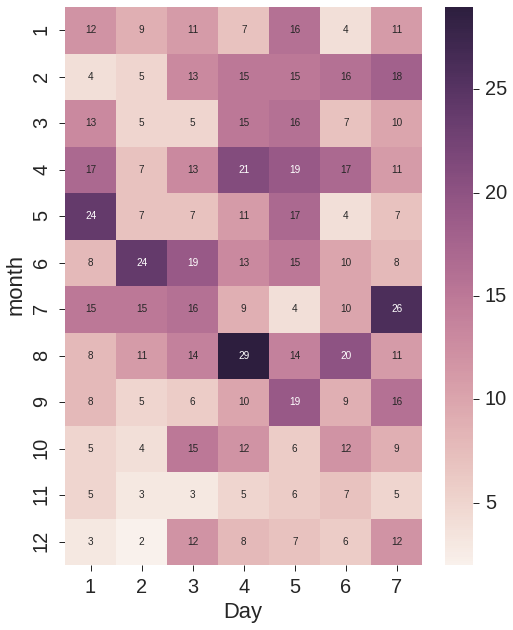

In [51]:
%matplotlib inline

# Now we can plot the heatmap with values in place

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

f = plt.figure(figsize=(8, 10))

sns.heatmap(dp, annot=True, fmt='d')


#sns.despine(offset=0, trim=True)
sns.set(style="ticks", font_scale=2.0)

In [53]:
df.describe()

month   Day        dTime       aDelay       dDelay  \
month Day                                                             
1     1   count   4422  4422  4422.000000  4422.000000  4422.000000   
          mean       1     1  1413.518770     6.569199    12.436454   
          std        0     0   472.888156    32.630523    28.808204   
          min        1     1     4.000000   -61.000000   -13.000000   
          25%        1     1  1012.000000   -11.000000    -2.000000   
          50%        1     1  1413.500000    -2.000000     1.000000   
          75%        1     1  1831.000000    15.000000    15.000000   
          max        1     1  2343.000000   617.000000   632.000000   
      2   count   4697  4697  4697.000000  4697.000000  4697.000000   
          mean       1     2  1394.571216     2.745582     9.151160   
          std        0     0   475.772296    28.345103    23.781501   
          min        1     2    36.000000   -67.000000   -14.000000   
          25%        1     2  1000.000000   -13.000000    -3.000000   
          50%        1     2  1405.000000    -4.000000     0.000000   
          75%        1     2  1821.000000    11.000000    11.000000   
          max        1     2  2350.000000   279.000000   283.000000   
      3   count   4670  4670  4670.000000  4670.000000  4670.000000   
          mean       1     3  1396.210921     4.493148    11.804283   
          std        0     0   476.508212    30.403072    27.073348   
          min        1     3    31.000000   -65.000000   -16.000000   
          25%        1     3  1001.000000   -12.000000    -2.000000   
          50%        1     3  1402.500000    -3.000000     0.000000   
          75%        1     3  1827.000000    12.000000    14.000000   
          max        1     3  2333.000000   275.000000   273.000000   
      4   count   3783  3783  3783.000000  3783.000000  3783.000000   
          mean       1     4  1387.630188     2.447528     7.073487   
          std        0     0   473.183468    24.864803    21.970833   
          min        1     4     9.000000   -56.000000   -15.000000   
          25%        1     4   959.000000   -11.000000    -3.000000   
          50%        1     4  1358.000000    -3.000000     0.000000   
...                ...   ...          ...          ...          ...   
12    4   std        0     0   433.116708    24.149510    21.180643   
          min       12     4   553.000000   -43.000000   -12.000000   
          25%       12     4  1015.000000    -7.000000    -2.000000   
          50%       12     4  1344.500000     1.000000     1.000000   
          75%       12     4  1744.000000    14.000000    10.000000   
          max       12     4  2348.000000   255.000000   275.000000   
      5   count   3284  3284  3284.000000  3284.000000  3284.000000   
          mean      12     5  1371.218331     5.595311     7.566687   
          std        0     0   435.146179    23.532851    19.569307   
          min       12     5   554.000000   -39.000000   -19.000000   
          25%       12     5  1014.000000    -8.000000    -2.000000   
          50%       12     5  1348.000000     1.000000     0.000000   
          75%       12     5  1747.500000    12.000000     9.000000   
          max       12     5  2335.000000   230.000000   236.000000   
      6   count   3723  3723  3723.000000  3723.000000  3723.000000   
          mean      12     6  1359.709374     4.912436     6.951383   
          std        0     0   430.588744    26.370737    23.171940   
          min       12     6    24.000000   -50.000000   -23.000000   
          25%       12     6  1011.000000    -9.000000    -3.000000   
          50%       12     6  1339.000000    -1.000000     0.000000   
          75%       12     6  1735.500000    12.000000     7.000000   
          max       12     6  2302.000000   483.000000   484.000000   
      7   count   3932  3932  3932.000000  3932.000000  3932.000000   
          mean      12     7  1396.316887

In [54]:
!free -m

             total       used       free     shared    buffers     cached
Mem:          2002       1222        780         75         10        137
-/+ buffers/cache:       1075        927
Swap:         1419        740        679


In [56]:
print(map(str, [1,3,5]))

In [57]:
for ch in map(chr,[65,66,67,68]):
    print(ch)

A
B
C
D
